<a href="https://colab.research.google.com/github/darshana402/Data-Analysis/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# New Section

READING THE CSV **FILE**

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/sercantutar/Heart-Disease-Prediction/master/dataset/heart.csv"
df = pd.read_csv('/content/Untitled spreadsheet.csv')

# Display first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
df.shape

(920, 16)

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
print(df.info())  # Check data types and missing values
print(df.isnull().sum())  # Count missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs         

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.354348,192.636957,138.290217,0.819565,0.227174,0.995652
std,265.725422,9.424685,18.682109,114.559993,25.311498,1.076582,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,164.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,221.000000,140.000000,0.200000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# checking the distribution of Target Variable
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


0 - > healthy heart
1 -> deactive heart

In [ ]:
X = df.drop(columns='num', axis=1)
Y = df['num']

In [ ]:
print(X)
print(Y)

      id  age  trestbps   chol  thalch  oldpeak   ca  sex_Male  \
0      1   63     145.0  233.0   150.0      2.3  0.0      True   
1      2   67     160.0  286.0   108.0      1.5  3.0      True   
2      3   67     120.0  229.0   129.0      2.6  2.0      True   
3      4   37     130.0  250.0   187.0      3.5  0.0      True   
4      5   41     130.0  204.0   172.0      1.4  0.0     False   
..   ...  ...       ...    ...     ...      ...  ...       ...   
915  916   54     127.0  333.0   154.0      0.0  0.0     False   
916  917   62     120.0  139.0   150.0      0.0  0.0      True   
917  918   55     122.0  223.0   100.0      0.0  0.0      True   
918  919   58     120.0  385.0   150.0      0.0  0.0      True   
919  920   62     120.0  254.0    93.0      0.0  0.0      True   

     dataset_Hungary  dataset_Switzerland  ...  cp_non-anginal  \
0              False                False  ...           False   
1              False                False  ...           False   
2        

# **SPLITING THE DATA**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(920, 22) (736, 22) (184, 22)


# **MODLE**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5285326086956522


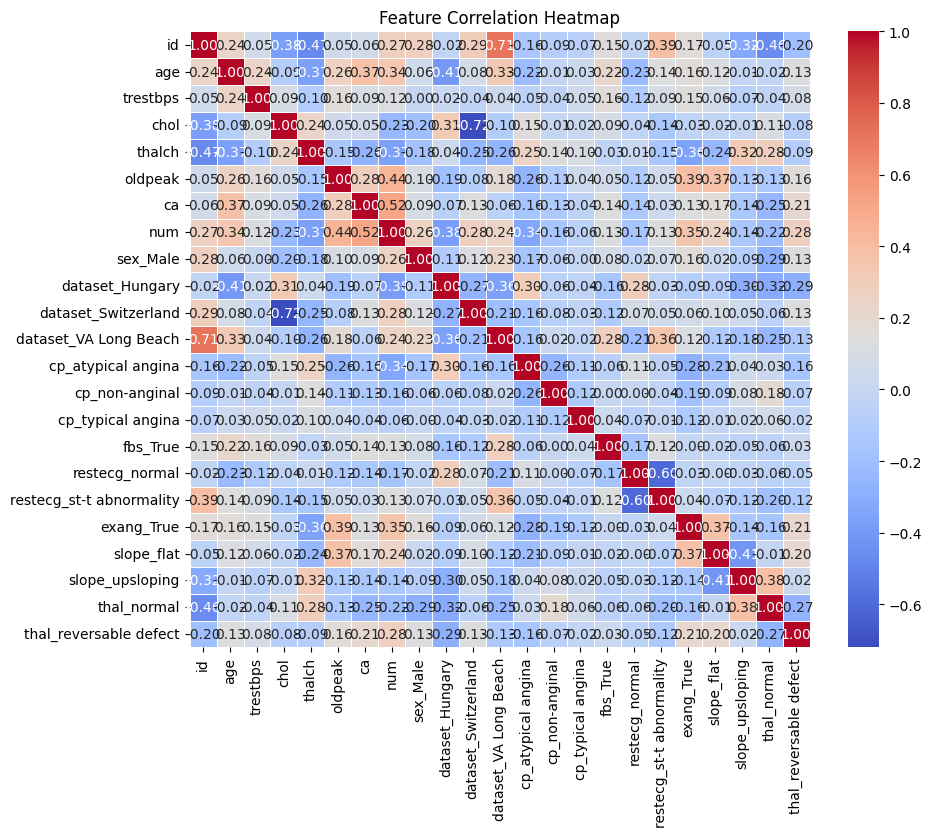

Highly Correlated Features to Remove: set()


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify features with correlation > 0.8
threshold = 0.8
high_corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_name = corr.columns[i]
            high_corr_features.add(col_name)

print("Highly Correlated Features to Remove:", high_corr_features)

# Drop highly correlated features
df_selected = df.drop(columns=high_corr_features)


In [ ]:
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.drop(columns=['thal_reversable defect'])  # Features
y = df['thal_reversable defect']  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 736, Testing samples: 184


# RANDOM FOREST

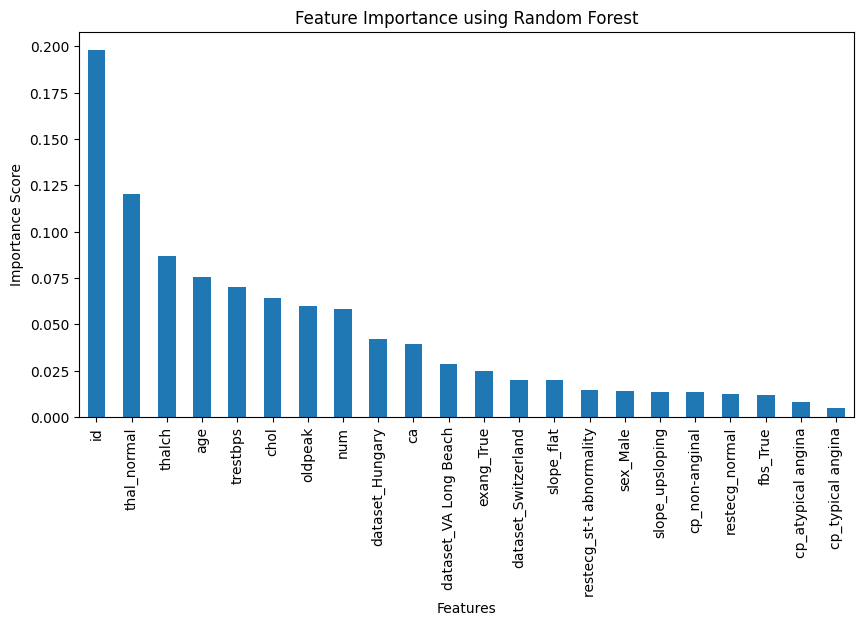

Selected Features: ['id', 'thal_normal', 'thalch', 'age', 'trestbps', 'chol', 'oldpeak', 'num', 'dataset_Hungary', 'ca', 'dataset_VA Long Beach', 'exang_True', 'dataset_Switzerland', 'slope_flat']


In [ ]:
# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
importances.plot(kind="bar")
plt.title("Feature Importance using Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Select top N features
top_rf_features = importances[importances > 0.02].index.tolist()  # Adjust threshold as needed
print("Selected Features:", top_rf_features)
X_selected_rf = X[top_rf_features]


In [ ]:
# Scale features for RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply RFE with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=8)  # Adjust number of features
rfe.fit(X_scaled, y)

# Get selected features
selected_rfe_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_rfe_features)

X_selected_rfe = X[selected_rfe_features]



Selected Features by RFE: Index(['id', 'trestbps', 'thalch', 'dataset_Hungary', 'dataset_Switzerland',
       'dataset_VA Long Beach', 'exang_True', 'thal_normal'],
      dtype='object')


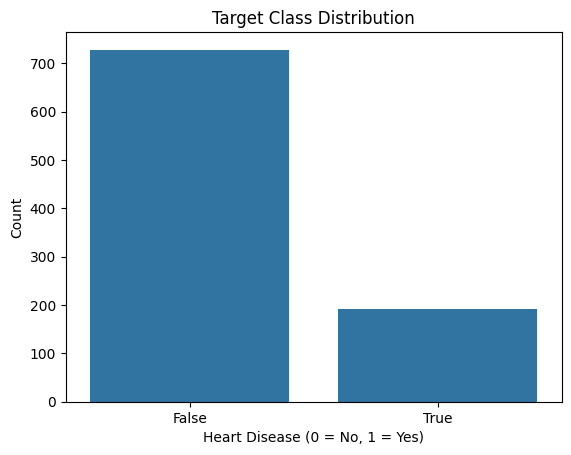

In [ ]:
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
